<a href="https://colab.research.google.com/github/navendu10/MLmodels_NB/blob/main/CNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, Conv2D
from tensorflow.keras.models import Model

In [5]:
f_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = f_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [6]:
x_train, x_test = x_train/255, x_test/255
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28)


In [7]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train.shape: ", x_train.shape)

x_train.shape:  (60000, 28, 28, 1)


In [8]:
K = len(set(y_train))
K

10

In [11]:
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3, 3), strides=2, activation='relu')(i)
x = Conv2D(64, (3, 3), strides=2, activation='relu')(x)
x = Conv2D(128, (3, 3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

In [12]:
model  = Model(i, x)

In [13]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 15ms/step - accuracy: 0.7458 - loss: 0.6948 - val_accuracy: 0.8420 - val_loss: 0.4257
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.8570 - loss: 0.3750 - val_accuracy: 0.8660 - val_loss: 0.3557
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.8792 - loss: 0.3218 - val_accuracy: 0.8801 - val_loss: 0.3224
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.8937 - loss: 0.2796 - val_accuracy: 0.8877 - val_loss: 0.3110
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9031 - loss: 0.2573 - val_accuracy: 0.8895 - val_loss: 0.3059
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9119 - loss: 0.2321 - val_accuracy: 0.8935 - val_loss: 0.2994
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 15ms/step - accuracy: 0.9187 - loss: 0.2101 - val_accuracy: 0.8938 - val_loss: 0.2982
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9274 -

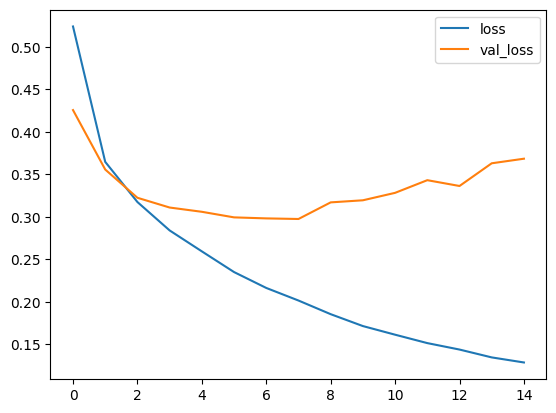

In [15]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

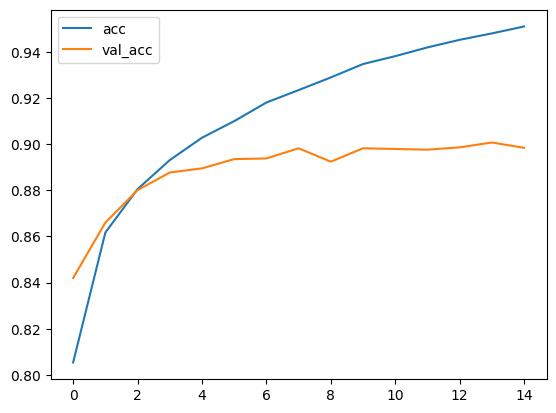

In [16]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step
Confusion matrix, without normalization
[[764   2  27  25   6   1 163   0  12   0]
 [  3 978   0  11   4   0   4   0   0   0]
 [ 11   0 846  10  58   0  74   0   1   0]
 [ 12   7  13 903  37   1  27   0   0   0]
 [  0   1  51  17 840   0  89   0   2   0]
 [  0   0   0   0   0 971   0  19   0  10]
 [ 65   0  58  26  73   0 767   0  11   0]
 [  0   0   0   0   0   9   0 975   0  16]
 [  0   1   3   3   7   1   4   2 979   0]
 [  1   0   0   0   0   6   0  32   0 961]]


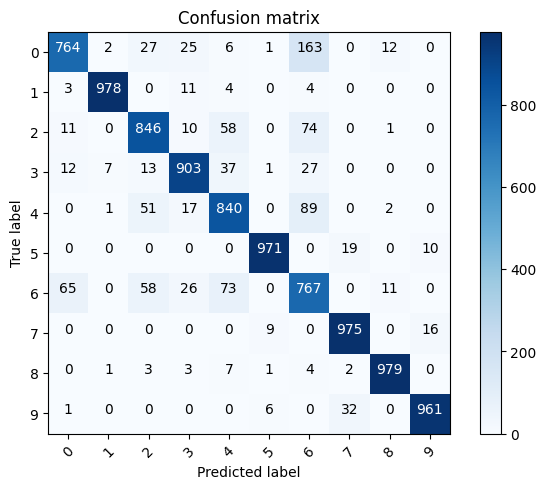

In [17]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [18]:
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

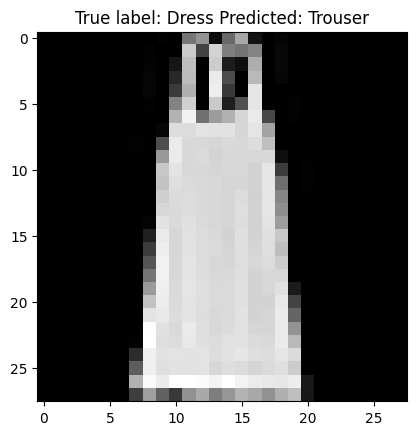

In [19]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));